# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.901615,0.730996,0.552578
1,2020-01-02,0.591704,0.328692,0.270098
2,2020-01-03,0.456645,0.303063,0.785464
3,2020-01-04,0.137512,0.712159,0.727528
4,2020-01-05,0.808011,0.592943,0.074320


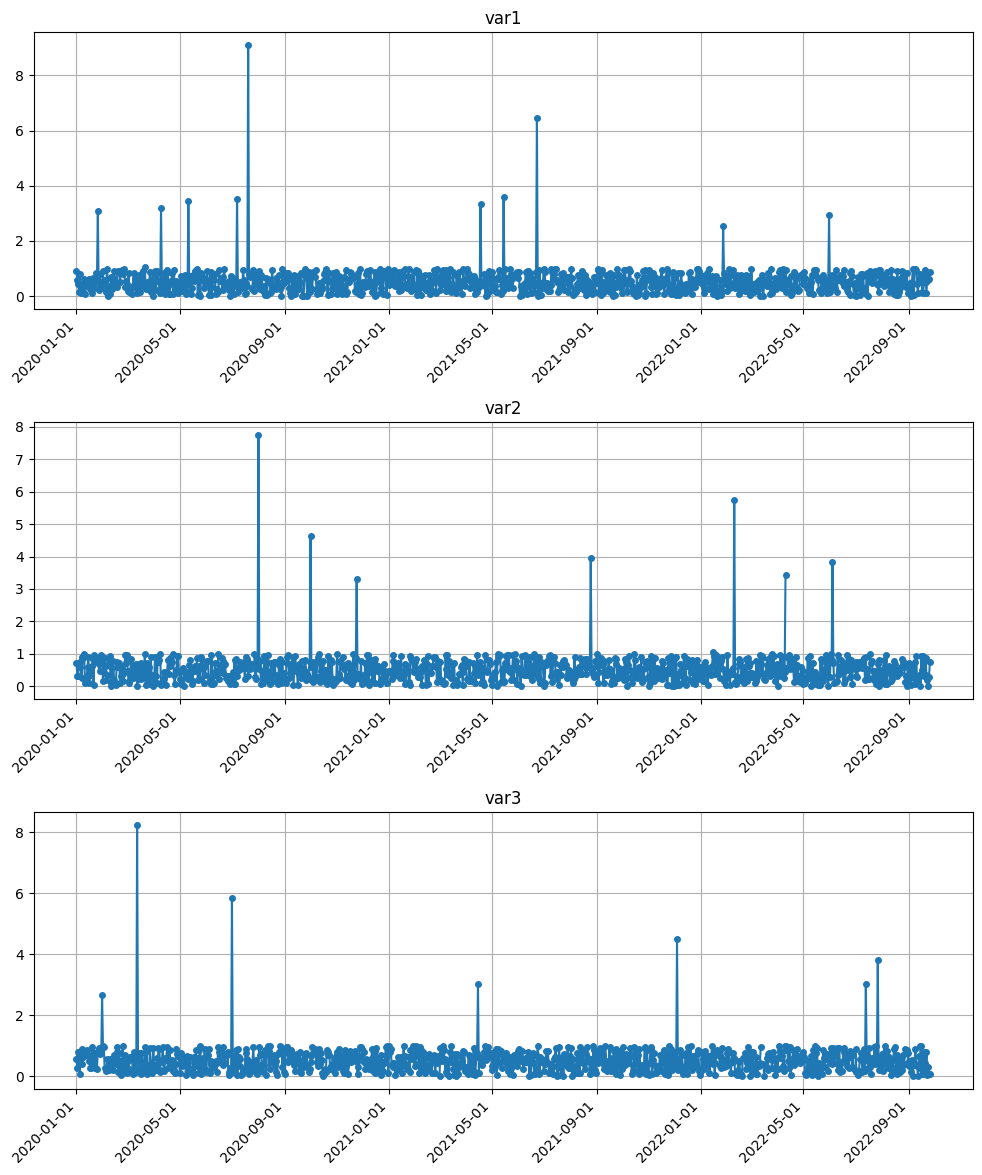

In [3]:
# plot the data
plot_df(df)

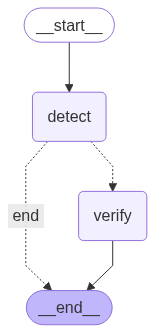

In [12]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-26 00:00:00', variable_value=3.096928, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2020-04-09 00:00:00', variable_value=3.177303, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2020-05-11 00:00:00', variable_value=3.442268, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2021-04-18 00:00:00', variable_value=3.325887, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2021-07-07 00:00:00', variable_value=3.528049, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2021-08-25 00:00:00', variable_value=3.94202, anomaly_description='Significantly higher value than previous data points.'), Anomaly(timestamp='2021-09-08 00:00:00', variable_value=6.445716, anomaly_description='Significantly high

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.head()

,timestamp,variable_name,value,anomaly_description
0,2020-01-26,var1,3.096928,Significantly higher value than previous data points.
1,2020-04-09,var1,3.177303,Significantly higher value than previous data points.
2,2020-05-11,var1,3.442268,Significantly higher value than previous data points.
3,2021-04-18,var1,3.325887,Significantly higher value than previous data points.
4,2021-07-07,var1,3.528049,Significantly higher value than previous data points.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.head()

,timestamp,var1,var1_description,var2,var2_description,var3,var3_description
0,2020-01-26,3.096928,Significantly higher value than previous data points.,NaN,NaN,NaN,NaN
1,2020-04-09,3.177303,Significantly higher value than previous data points.,NaN,NaN,NaN,NaN
2,2020-05-11,3.442268,Significantly higher value than previous data points.,NaN,NaN,NaN,NaN
3,2021-04-18,3.325887,Significantly higher value than previous data points.,NaN,NaN,NaN,NaN
4,2021-07-07,3.528049,Significantly higher value than previous data points.,NaN,NaN,NaN,NaN


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var1_description,var2_anomaly_flag,var2_description,var3_anomaly_flag,var3_description
0,2020-01-01,0.901615,0.730996,0.552578,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.591704,0.328692,0.270098,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.456645,0.303063,0.785464,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.137512,0.712159,0.727528,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.808011,0.592943,0.074320,NaN,NaN,NaN,NaN,NaN,NaN


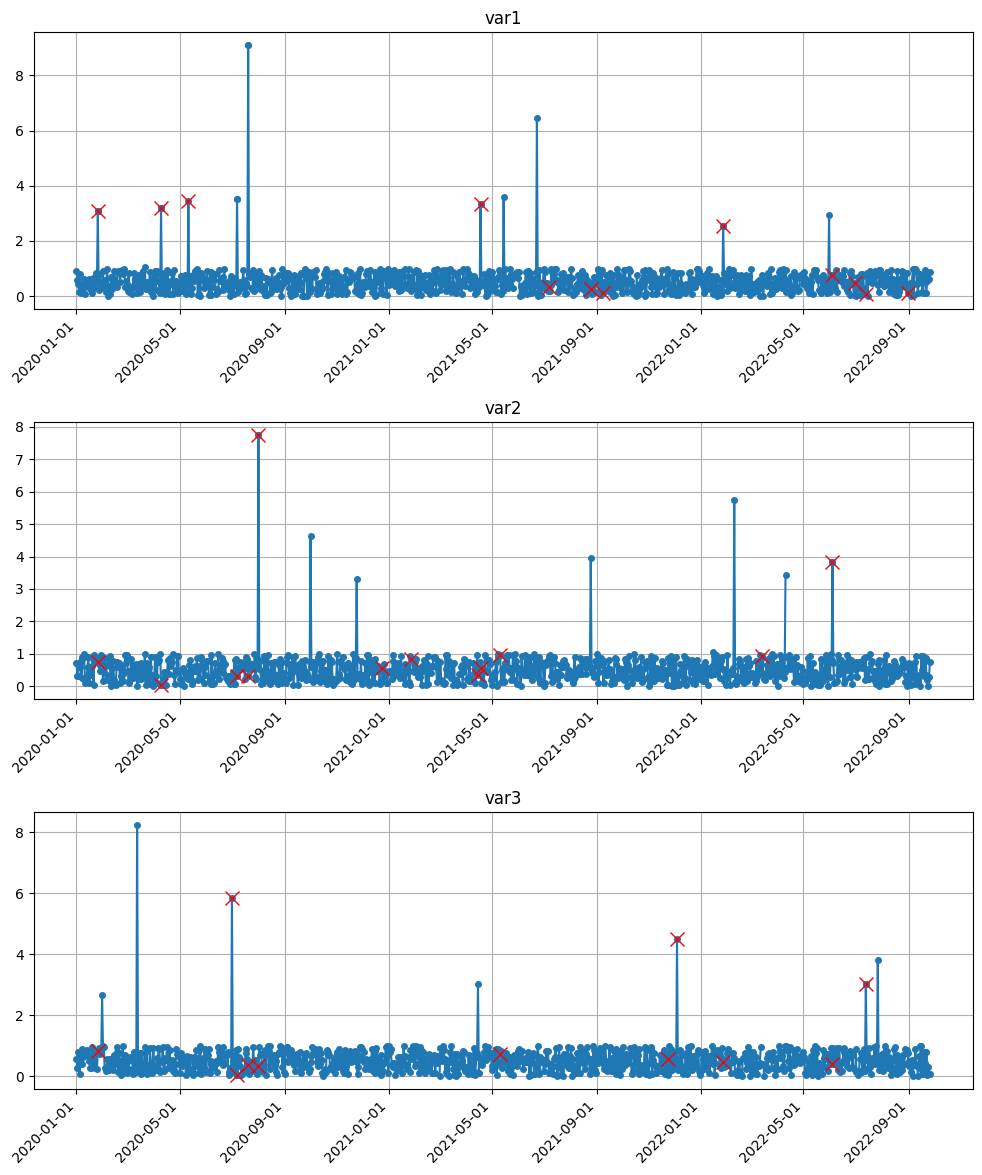

In [9]:
# plot final data with anomalies
plot_df(df_final)